# Projeto 1 - Ciência dos Dados

Nome: Omar Dibo Calixto Afrange Neto

## Pergunta (s) a ser respondida

Ex.: Qual foi o impacto da entrada dos paises no Mercosul (somente membros), em seus indicadores de desigualdade social (Coeficiente GINI), Inflacao e Investimentos em infraestrutura?

## Explicação da hipótese e mecanismo

Analizando os indicadores de desigualdade social (Coeficiente GINI), Inflação e Investimentos, antes e apos a entrada dos paises no mercosul, chegamos a hipotese de que ao se juntar a esta organizacao, os paises tendem a aumentar o estimulo do comercio exterior, aumentando os investimetos em infraestrutura, diminuindo a inflacao e a desigualdade do pais.


### Entrada dos paises no Mercosul:

#### Argentina(1991)

#### Brasil(1991)

#### Paraguai(1991)

#### Uruguai(1991)

#### Venezuela(2012)

## Bases de dados usadas

Indique quais as variáveis de interesse vêm de cada uma

Inequality(GINI Coeficient) - http://gapm.io/ddgini

Inflation, GDP deflator (annual %) - https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG

Gross capital formation (% of GDP) - https://data.worldbank.org/indicator/NE.GDI.TOTL.ZS


## Bibliografia

https://pt.wikipedia.org/wiki/Estados-membros_do_Mercosul

https://mundoeducacao.bol.uol.com.br/geografia/paisesmembros-mercosul.htm

https://brasilescola.uol.com.br/geografia/mercosul-paises-integrantes.htm

http://www.mercosul.gov.br/saiba-mais-sobre-o-mercosul

https://www.mercosur.int/pt-br/quem-somos/paises-do-mercosul/

https://www.gapminder.org/data/

## Análise de dados

Insira abaixo uma análise de dados tratada para ter maior clareza. 

Lembre-se de que, além deste arquivo principal, você precisa entregar um ou mais *notebooks* mais brutos com todas as tentativas que fez e que não deram certo .

**Não inclua dados ou gráficos sem motivação nem interpretação** - sempre que fizer uma análise, plot ou tablea, diga qual sua intenção. Logo após a apresentação diga qual conclusão específica ou interpretação você tira daquela análise

In [68]:
#Imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [3]:
#Abrindo Arquivos
IndicadorDesigualdade = pd.read_excel("inequality.xlsx").set_index("country")
IndicadorInflacao = pd.read_excel("inflation_annual_percent.xlsx").set_index("country")
IndicadorInvestimentos= pd.read_excel("investments_percent_of_gdp.xlsx").set_index("country")

In [85]:
#Filtro 1980 a 2016
paises=["Brazil","Venezuela", "Paraguay", "Uruguay","Argentina"]
datas=[1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

IndicadorDesigualdadeFiltrado=IndicadorDesigualdade.loc[paises,datas]
IndicadorInflacaoFiltrado=IndicadorInflacao.loc[paises,datas]
IndicadorInvestimentosFiltrado=IndicadorInvestimentos.loc[paises,datas]

#Renomeando As Colunas
for d in datas:
    IndicadorDesigualdadeFiltrado.rename(columns={d: 'Indicador_Desigualdade_{}'.format(d)}, inplace=True)
    IndicadorInflacaoFiltrado.rename(columns={d: 'Indicador_Inflacao_{}'.format(d)}, inplace=True)
    IndicadorInvestimentosFiltrado.rename(columns={d: 'Indicador_Investimentos_{}'.format(d)}, inplace=True)


#Unindo Os DataFrames
dataframe=pd.merge(IndicadorDesigualdadeFiltrado,IndicadorInflacaoFiltrado, left_index=True, right_index=True)
dataframe=pd.merge(dataframe,IndicadorInvestimentosFiltrado, left_index=True, right_index=True)
dataframe.head(5)

,Indicador_Desigualdade_1980,Indicador_Desigualdade_1981,Indicador_Desigualdade_1982,Indicador_Desigualdade_1983,Indicador_Desigualdade_1984,Indicador_Desigualdade_1985,Indicador_Desigualdade_1986,Indicador_Desigualdade_1987,Indicador_Desigualdade_1988,Indicador_Desigualdade_1989,...,Indicador_Investimentos_2007,Indicador_Investimentos_2008,Indicador_Investimentos_2009,Indicador_Investimentos_2010,Indicador_Investimentos_2011,Indicador_Investimentos_2012,Indicador_Investimentos_2013,Indicador_Investimentos_2014,Indicador_Investimentos_2015,Indicador_Investimentos_2016
country,,,,,,,,,,,,,,,,,,,,,
Brazil,57.1,57.8,58.2,57.9,58.0,58.2,58.7,59.7,60.7,60.3,...,19.8,21.6,18.8,21.8,21.8,21.4,21.7,20.5,17.4,15.4
Venezuela,55.8,55.3,55.0,54.9,54.5,54.2,53.1,51.2,49.3,47.2,...,30.3,26.8,25.8,22.0,23.1,26.6,27.3,24.8,NaN,NaN
Paraguay,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,40.8,41.5,...,15.8,16.4,13.8,16.2,17.1,15.1,15.4,16.3,16.8,18.0
Uruguay,43.3,43.4,43.4,43.3,43.2,43.0,42.9,42.7,42.6,42.6,...,19.5,23.2,19.6,19.4,20.9,22.9,22.5,21.2,19.7,17.8
Argentina,40.4,41.0,41.5,41.8,42.1,42.9,43.7,44.5,45.3,46.1,...,20.1,19.6,16.1,17.7,18.4,16.5,17.3,17.3,17.1,17.0


# Desigualdade

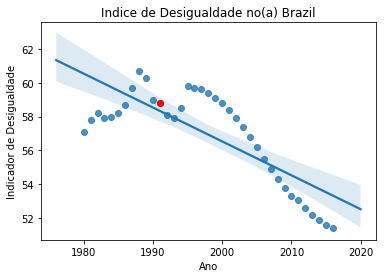

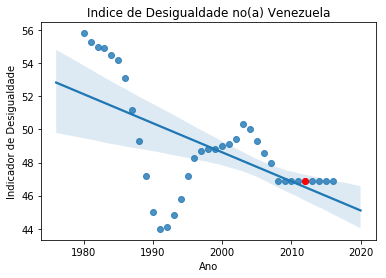

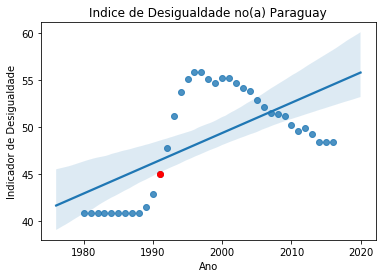

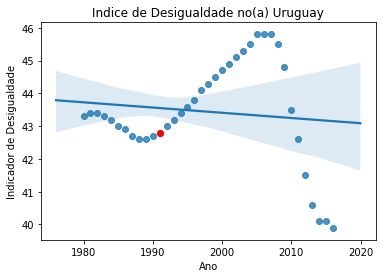

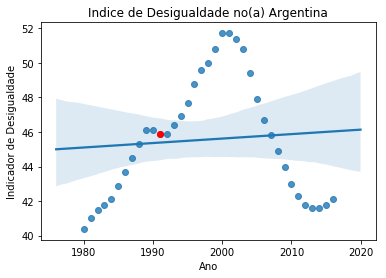

In [120]:
for pais in paises:
    info = IndicadorDesigualdadeFiltrado.loc[pais]
    idx = 11
    ano = 1991
    if pais == 'Venezuela':
        ano=2012
        idx= 1-6
    sns.regplot(datas,info)
    plt.plot(ano,info[idx],'ro')
    plt.title('Indice de Desigualdade no(a) {}'.format(pais))
    plt.ylabel('Indicador de Desigualdade')
    plt.xlabel('Ano')
    plt.show()

Examinando os Indices De Desigualdade nos paises antes e depois da entrada no Mercosul, podemos perceber que todos os paises excluindo o Brasil e a venezuela(que entrou somente em 2012), sofreram um aumento significativo, na desigualdade, contrariando a hipotese apresentada no inicio do projeto.

# Inflação

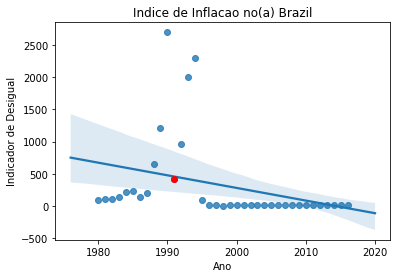

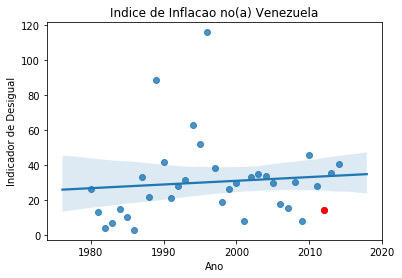

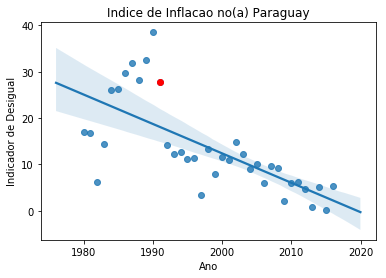

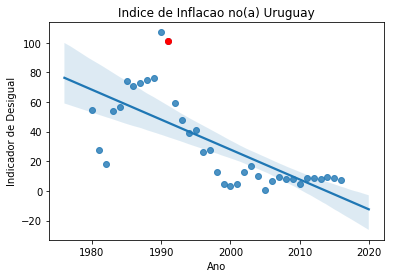

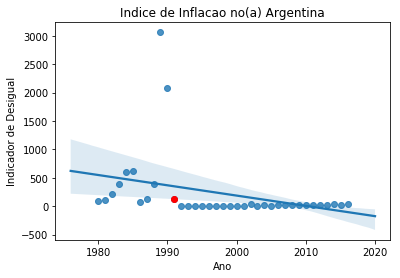

In [122]:
for pais in paises:
    info = IndicadorInflacaoFiltrado.loc[pais]
    idx = 11
    ano = 1991
    if pais == 'Venezuela':
        ano=2012
        idx= 1-6
    sns.regplot(datas,info)
    plt.plot(ano,info[idx],'ro')
    plt.title('Indice de Inflacao no(a) {}'.format(pais))
    plt.ylabel('Indicador de Desigual')
    plt.xlabel('Ano')
    plt.show()

Analisando a inflação nos paises antes e depois da entrada no Mercosul, podemos perceber que Brasil, Paraguai, Uruguay e Argentina cairam, enquanto a Venezuela que entrou somente em 2012, não apresentou melhora até o momento, seguindo parcialmente a hipótese, apresentada no inicio do projeto.

# Investimentos Em Infraestrutura

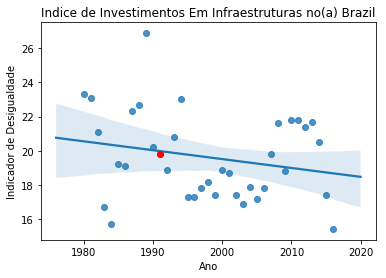

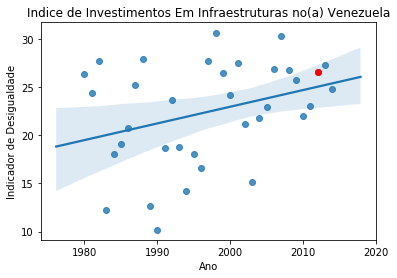

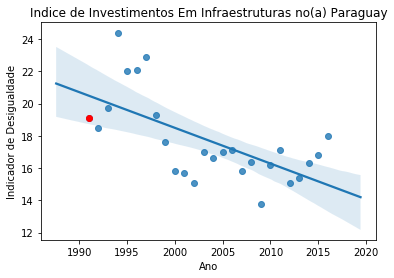

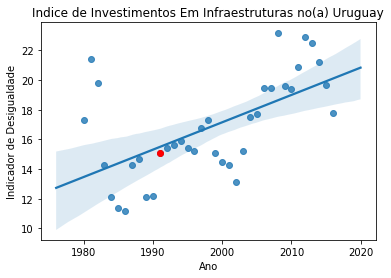

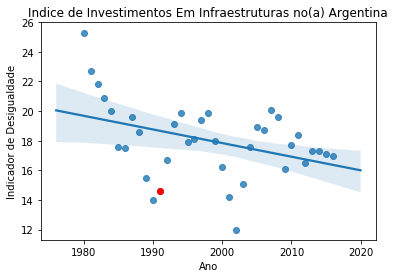

In [123]:
for pais in paises:
    info=IndicadorInvestimentosFiltrado.loc[pais]
    idx = 11
    ano = 1991
    if pais == 'Venezuela':
        ano=2012
        idx= 1-6
    sns.regplot(datas,info)
    plt.plot(ano,info[idx],'ro')
    plt.title('Indice de Investimentos Em Infraestruturas no(a) {}'.format(pais))
    plt.ylabel('Indicador de Desigualdade')
    plt.xlabel('Ano')
    plt.show()

Observando os investimentos em infraestruturas nos paises antes e depois da entrada no Mercosul, podemos perceber que Argentina, Uruguay e Venezuela sofreram aumento significante, enquanto o Brasil e o Paraguai, tiveram um crescimento momentaneo, e depois voltaram para os valores anteriores, seguindo também, parcialmente a hipotese apresentada no inicio do projeto.

## Conclusão

Responda à pergunta, argumento da melhor forma possível com base nos dados

Ponderando as analises feitas sobre os gráficos chegamos a conclusão que, após a entrada dos paises no Mercosul, a inflação sofreu uma queda significativa, enquanto os investimentos feitos em infraestrutura aumentaram na maioria dos países. No entanto a Desigualdade subiu em preponderancia nos países aqui estudados. Tais fatos indicam então que a hipótese segue uma base consistente quanto a Inflação E Investimentos, porem falha ao afirmar que a Desigualdade iria ser Mais Nivelada. 

Devemos considerar também que a Venezuela sofreu nesta epoca de analise, diversos conflitos internos, podendo então impactar nas analises feitas.